In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path # working with paths
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Setting data paths with pathlib
data_path = Path('/home/mai22042/otto/data')
train_path = data_path/'train.jsonl'
test_path = data_path/'test.jsonl'
sample_sub_path = Path('sample_submission.csv')

In [4]:
# https://www.kaggle.com/code/columbia2131/otto-read-a-chunk-of-jsonl-to-manageable-df/
train_set = pd.DataFrame()
chunks = pd.read_json(data_path / 'train.jsonl', lines=True, chunksize=100_000)

for e, chunk in enumerate(chunks):
    event_dict = {
        'session': [],
        'aid': [],
        'ts': [],
        'type': [],
    }

    # train_set = pd.concat([train_set, chunk])
    for session, events in zip(chunk['session'].tolist(), chunk['events'].tolist()):
        for event in events:
            event_dict['session'].append(session)
            event_dict['aid'].append(event['aid'])
            event_dict['ts'].append(event['ts'])
            event_dict['type'].append(event['type'])
    chunk_session = pd.DataFrame(event_dict)
    train_set = pd.concat([train_set, chunk_session])

        
train_set = train_set.reset_index(drop=True)

In [6]:
display(train_set)

,session,aid,ts,type
0,0,1517085,1659304800025,clicks
1,0,1563459,1659304904511,clicks
2,0,1309446,1659367439426,clicks
3,0,16246,1659367719997,clicks
4,0,1781822,1659367871344,clicks
...,...,...,...,...
216716091,12899776,1737908,1661723987073,clicks
216716092,12899777,384045,1661723976974,clicks
216716093,12899777,384045,1661723986800,clicks
216716094,12899778,561560,1661723983611,clicks


In [7]:
train_set.rename(index=str, columns={'session': 'session_id',
                              'aid' : 'product_id',
                              'ts' : 'time_stamp',
                              'type' : 'event_type'}, inplace=True)

In [8]:
train_set.head(20)

,session_id,product_id,time_stamp,event_type
0,0,1517085,1659304800025,clicks
1,0,1563459,1659304904511,clicks
2,0,1309446,1659367439426,clicks
3,0,16246,1659367719997,clicks
4,0,1781822,1659367871344,clicks
5,0,1152674,1659367885796,clicks
6,0,1649869,1659369893840,carts
7,0,461689,1659369898050,carts
8,0,305831,1659370027105,orders
9,0,461689,1659370027105,orders


In [9]:
train_set['date'] = pd.to_datetime(train_set['time_stamp'], unit='ms')
train_set.head(20)

,session_id,product_id,time_stamp,event_type,date
0,0,1517085,1659304800025,clicks,2022-07-31 22:00:00.025
1,0,1563459,1659304904511,clicks,2022-07-31 22:01:44.511
2,0,1309446,1659367439426,clicks,2022-08-01 15:23:59.426
3,0,16246,1659367719997,clicks,2022-08-01 15:28:39.997
4,0,1781822,1659367871344,clicks,2022-08-01 15:31:11.344
5,0,1152674,1659367885796,clicks,2022-08-01 15:31:25.796
6,0,1649869,1659369893840,carts,2022-08-01 16:04:53.840
7,0,461689,1659369898050,carts,2022-08-01 16:04:58.050
8,0,305831,1659370027105,orders,2022-08-01 16:07:07.105
9,0,461689,1659370027105,orders,2022-08-01 16:07:07.105


In [ ]:
train_set.drop('year_month', inplace=True, axis=1)

train_set.head(5)

In [11]:
train_set.insert(loc=3, column='year', value=train_set['date'].map(lambda x: x.year))

In [12]:
train_set.insert(loc=4, column='month', value=train_set['date'].map(lambda x: x.month))

In [13]:
train_set.insert(loc=5, column='day', value=train_set['date'].map(lambda x: x.day))

In [14]:
train_set.head(5)
train_set.insert(loc=7, column='day2', value=(train_set.date.dt.dayofweek)+1)


In [15]:
train_set.insert(loc=8, column='hour', value=train_set.date.dt.hour)

In [16]:
train_set.head(5)

,session_id,product_id,time_stamp,year,month,day,event_type,day2,hour,date
0,0,1517085,1659304800025,2022,7,31,clicks,7,22,2022-07-31 22:00:00.025
1,0,1563459,1659304904511,2022,7,31,clicks,7,22,2022-07-31 22:01:44.511
2,0,1309446,1659367439426,2022,8,1,clicks,1,15,2022-08-01 15:23:59.426
3,0,16246,1659367719997,2022,8,1,clicks,1,15,2022-08-01 15:28:39.997
4,0,1781822,1659367871344,2022,8,1,clicks,1,15,2022-08-01 15:31:11.344


In [17]:
train_set = train_set[['session_id','product_id','event_type','time_stamp','year','month','day','day2','hour','date']]

In [19]:
train_set.head(5)

,session_id,product_id,event_type,time_stamp,year,month,day,day2,hour,date
0,0,1517085,clicks,1659304800025,2022,7,31,7,22,2022-07-31 22:00:00.025
1,0,1563459,clicks,1659304904511,2022,7,31,7,22,2022-07-31 22:01:44.511
2,0,1309446,clicks,1659367439426,2022,8,1,1,15,2022-08-01 15:23:59.426
3,0,16246,clicks,1659367719997,2022,8,1,1,15,2022-08-01 15:28:39.997
4,0,1781822,clicks,1659367871344,2022,8,1,1,15,2022-08-01 15:31:11.344


In [18]:
# creating a csv from dataframe
train_set.to_csv("otto-data-train-an-last.csv", index=False)

In [4]:
train_set= pd.read_csv('/home/mai22042/otto/src/data analysis/otto-data-train-an-last.csv')

In [ ]:
print(train_set.nunique())

In [6]:
# which session was more active
train_sessions = train_set['session_id'].value_counts()
print(train_sessions)



6265682     500
4110619     500
10776795    499
1870739     499
2473055     498
           ... 
10731401      2
6311756       2
10731403      2
10731405      2
12899778      2
Name: session_id, Length: 12899779, dtype: int64


In [ ]:
# unique products and how often they are clicked, put in cart, or bought
train_products = train_set['product_id'].value_counts()
train_products.head(10)

1460571    129004
485256     126836
108125     118524
29735      113279
1733943    105091
            ...  
353667          3
279299          3
1320306         3
1816720         3
651154          3
Name: product_id, Length: 1855603, dtype: int64


1460571    129004
485256     126836
108125     118524
29735      113279
1733943    105091
832192      91325
184976      90244
166037      84657
554660      80197
231487      79872
1502122     78203
986164      76988
1603001     76737
322370      74027
1236775     74026
332654      71732
1196256     68329
756588      66962
1083665     65124
959208      64900
Name: product_id, dtype: int64

In [22]:
#Total number of "clicks" in train session
n_clicks = len(train_set[train_set['event_type'].map(lambda x:x == 'clicks')])
print(f'sessions[train_set] contain : {n_clicks} number of "clicks" in total')
#Total number of "carts" in train session
n_carts = len(train_set[train_set['event_type'].map(lambda x:x == 'carts')])
print(f'sessions[train_set] contain : {n_carts} number of "carts" in total')
#Total number of "orders" in train session
n_orders = len(train_set[train_set['event_type'].map(lambda x:x == 'orders')])
print(f'sessions[train_set] contain : {n_orders} number of "orders" in total')

sessions[train_set] contain : 194720954 number of "clicks" in total
sessions[train_set] contain : 16896191 number of "carts" in total
sessions[train_set] contain : 5098951 number of "orders" in total


In [13]:
#n_cer = len(train_set[train_set['event_type'].map(lambda x:x == type) & train_set['month'].map(lambda x:x == month)])
#print(f'sessions[train_set] contain : {n_cer} number of "clicks" in total')

In [ ]:
types=['clicks','carts','orders']
months=[5,6,7,8,9]
for month in months:
    for type in types:
        #n_o_e = train_set[train_set['event_type'].map(lambda x:x == type)]
        #n_month = train_set[train_set['month'].map(lambda x:x == month)]
        n_e_p_m = len(train_set[(train_set['event_type'].map(lambda x:x == type)) & (train_set['month'].map(lambda x:x == month))])
        print(f'Durring the {month} month, {n_e_p_m} number of type "{type}" actions occured.')

In [31]:
# Which month is the busiest?
train_month = train_set['month'].value_counts()
print(train_month)

8    216366984
7       349112
Name: month, dtype: int64


/tmp/ipykernel_1079866/1087421980.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_day = train_day[:10,]
/home/mai22042/miniconda3/envs/thesis/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


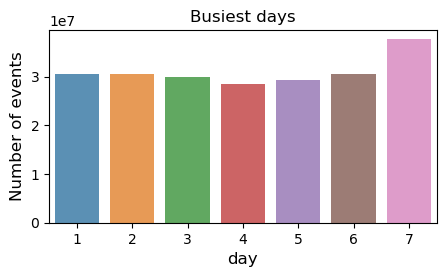

In [13]:
# Which day is the busiest?
train_day = train_set['day2'].value_counts()
train_day = train_day[:10,]
plt.figure(figsize=(5,2.5))
sns.barplot(train_day.index, train_day.values, alpha=0.8)
plt.title('Busiest days')
plt.ylabel('Number of events', fontsize=12)
plt.xlabel('day', fontsize=12)
plt.show()

<AxesSubplot: xlabel='day2', ylabel='count'>

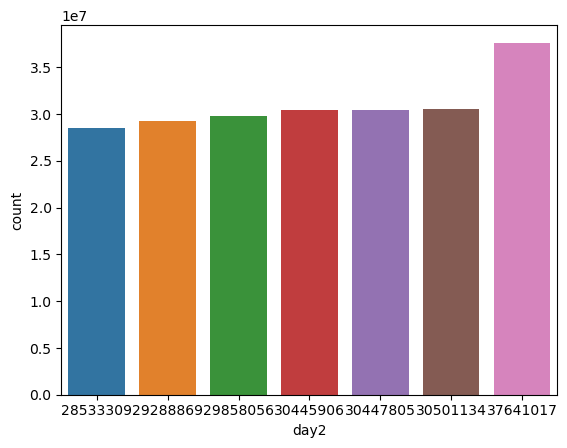

In [8]:
sns.countplot(x=train_set['day2'], data=train_day)

In [ ]:
sns.countplot(x=train_set["session_id"])

<AxesSubplot: xlabel='event_type', ylabel='count'>

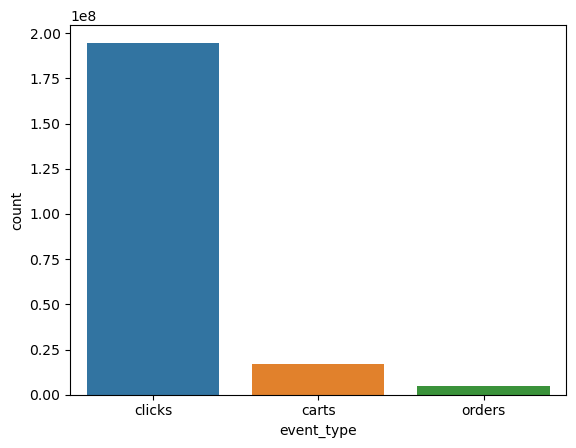

In [15]:
sns.countplot(x=train_set["event_type"])

In [17]:
sns.countplot(data=train_set, x=train_products.head(10), hue="event_type")

NameError: name 'train_products' is not defined

<AxesSubplot: xlabel='event_type', ylabel='count'>

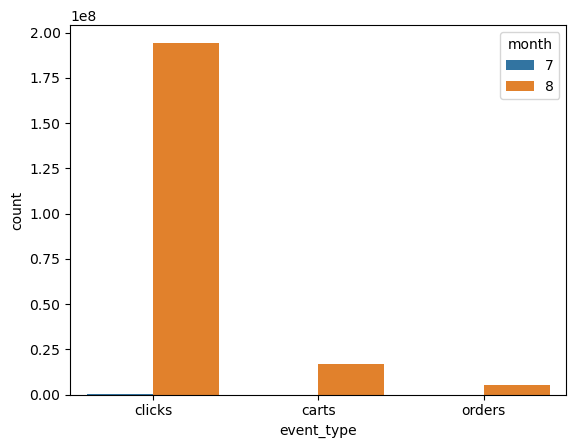

In [18]:
sns.countplot(data=train_set, x=train_set["event_type"], hue="month")